In [2]:
from time import sleep
from functools import reduce
from os.path import expanduser
import requests

import numpy as np
import pandas as pd
import pingouin as pg
from scipy import stats
import matplotlib.pyplot as plt

In [5]:
query = 'https://api.nytimes.com/svc/search/v2/articlesearch.json?{}'+\
        '&begin_date={}0101&end_date={}1231&fq=source:("The New York Times")'+\
        '&api-key=RJAd3h9ALpVxfFYkQxGzsGdzM8HmltWC'

In [6]:
response = requests.get(query.format('q=racism', 1980, 2018))
response.json()['response']['meta']

{'hits': 22649, 'offset': 0, 'time': 80}

In [34]:
results_total = []
for x in range(1980, 2023):
    sleep(13) # Rate limit.
    response = requests.get(query.format('', x, x))
    results_total.append(response.json()['response']['meta']['hits'])

results_racism = []
for x in range(1980, 2023):
    sleep(13) # Rate limit.
    response = requests.get(query.format('q=racism', x, x))
    results_racism.append(response.json()['response']['meta']['hits'])
    
results_diversity = []
for x in range(1980, 2023):
    sleep(13) # Rate limit.
    response = requests.get(query.format('q=diversity', x, x))
    results_diversity.append(response.json()['response']['meta']['hits'])

results_diversity_inclusion = []
for x in range(1980, 2023):
    sleep(13) # Rate limit.
    response = requests.get(query.format('q="diversity and inclusion"', x, x))
    results_diversity_inclusion.append(response.json()['response']['meta']['hits'])

results_workers = []
for x in range(1980, 2023):
    sleep(13) # Rate limit.
    response = requests.get(query.format('q=workers', x, x))
    results_workers.append(response.json()['response']['meta']['hits'])

results_unemployment = []
for x in range(1980, 2023):
    sleep(13) # Rate limit.
    response = requests.get(query.format('q=unemployment', x, x))
    results_unemployment.append(response.json()['response']['meta']['hits'])

results_wage = []
for x in range(1980, 2023):
    sleep(13) # Rate limit.
    response = requests.get(query.format('q="minimum wage"', x, x))
    results_wage.append(response.json()['response']['meta']['hits'])


In [44]:
print(results_total, results_racism, results_diversity, results_diversity_inclusion, results_workers, results_unemployment, results_wage, sep='\n\n')

[81343, 95805, 99951, 105250, 111368, 106677, 110743, 108211, 106489, 104531, 98905, 85588, 86038, 82020, 79456, 85405, 79789, 90018, 94244, 96394, 103177, 111404, 110050, 108072, 108057, 121485, 164883, 101161, 119085, 147368, 112642, 102969, 101272, 88984, 85945, 80244, 69499, 60416, 61111, 53576, 55549, 54109, 48689]

[314, 285, 255, 327, 314, 422, 393, 586, 572, 663, 736, 719, 694, 597, 556, 637, 499, 533, 472, 562, 626, 751, 514, 422, 403, 492, 762, 444, 578, 539, 406, 351, 443, 473, 567, 803, 1250, 1223, 1466, 1552, 3132, 2240, 1466]

[477, 505, 469, 471, 572, 535, 618, 604, 665, 636, 727, 772, 796, 897, 717, 728, 707, 729, 784, 885, 1004, 1060, 974, 935, 896, 1067, 1517, 907, 917, 1067, 982, 884, 1029, 908, 1034, 1092, 1393, 1426, 1597, 5173, 5405, 4152, 3490]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 3, 0, 0, 1, 2, 0, 0, 1, 1, 2, 5, 8, 1, 5, 5, 3, 5, 2, 9, 20, 22, 41, 54, 62, 65, 138, 149, 58]

[6291, 6619, 6732, 6286, 6697, 6250, 6446, 6270, 6439, 6519, 6559, 6213, 6373, 

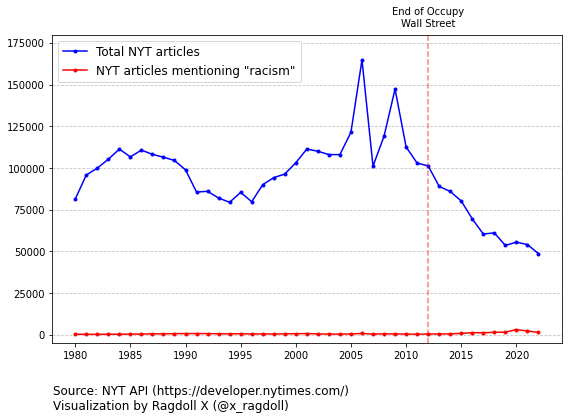

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

ax.plot(range(1980, 2023), results_total, marker='.', color='blue', label='Total NYT articles')
ax.plot(range(1980, 2023), results_racism, marker='.', color='red', label='NYT articles mentioning "racism"')
ax.plot((2012, 2012), (-10000, 200000), 'r--', alpha=.5)
ax.set_xticks(range(1980, 2023, 5))
ax.set_xticklabels(range(1980, 2023, 5))
ax.set_ylim((-5000, 180000))
ax.set_yticks(range(0, 175001, 25000))
ax.grid(axis='y', linestyle='--', alpha=.75)
ax.legend(fontsize=12, loc='upper left')
ax.text(2012, 185000, 'End of Occupy\nWall Street', fontsize=10, ha='center')
ax.text(1978, -45000, 'Source: NYT API (https://developer.nytimes.com/)\nVisualization by Ragdoll X (@x_ragdoll)', fontsize=12)

plt.tight_layout()
plt.show()
fig.savefig(
    expanduser('~')+'/Documents/Surveys/Does The Left Focus Too Much on Racism/fig1.png',
    facecolor='w', edgecolor='w', transparent=False, dpi=80
)

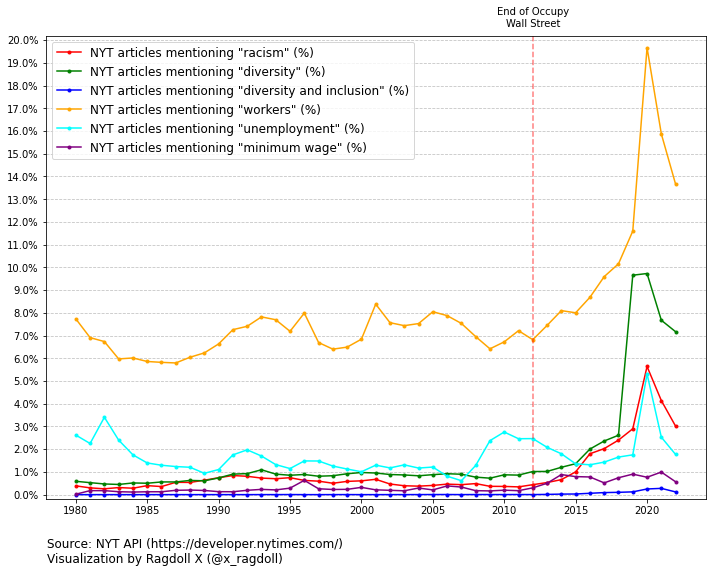

In [54]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

ax.plot(range(1980, 2023), results_racism/np.array(results_total), marker='.', color='red', label='NYT articles mentioning "racism" (%)')
ax.plot(range(1980, 2023), results_diversity/np.array(results_total), marker='.', color='green', label='NYT articles mentioning "diversity" (%)')
ax.plot(range(1980, 2023), results_diversity_inclusion/np.array(results_total), marker='.', color='blue', label='NYT articles mentioning "diversity and inclusion" (%)')
ax.plot(range(1980, 2023), results_workers/np.array(results_total), marker='.', color='orange', label='NYT articles mentioning "workers" (%)')
ax.plot(range(1980, 2023), results_unemployment/np.array(results_total), marker='.', color='cyan', label='NYT articles mentioning "unemployment" (%)')
ax.plot(range(1980, 2023), results_wage/np.array(results_total), marker='.', color='purple', label='NYT articles mentioning "minimum wage" (%)')
ax.plot((2012, 2012), (-.1, .21), 'r--', alpha=.5)
ax.set_xticks(range(1980, 2023, 5))
ax.set_xticklabels(range(1980, 2023, 5))
ax.set_ylim((-.002, .202))
ax.set_yticks(np.arange(0, .201, .01))
ax.set_yticklabels(['{}%'.format(y.round(1)) for y in np.arange(0, 20.1, 1)])
ax.grid(axis='y', linestyle='--', alpha=.75)
ax.legend(fontsize=12, loc='upper left')
ax.text(2012, .206, 'End of Occupy\nWall Street', fontsize=10, ha='center')
ax.text(1978, -.03, 'Source: NYT API (https://developer.nytimes.com/)\nVisualization by Ragdoll X (@x_ragdoll)', fontsize=12)

plt.tight_layout()
plt.show()
fig.savefig(
    expanduser('~')+'/Documents/Surveys/Does The Left Focus Too Much on Racism/fig2.png',
    facecolor='w', edgecolor='w', transparent=False, dpi=80
)

In [47]:
results_opinion = []
for x in range(1980, 2023):
    sleep(13) # Rate limit.
    response = requests.get(query.format('q="diversity of opinion"', x, x))
    results_opinion.append(response.json()['response']['meta']['hits'])

results_immigrant_workers = []
for x in range(1980, 2023):
    sleep(13) # Rate limit.
    response = requests.get(query.format('q="immigrant workers"', x, x))
    results_immigrant_workers.append(response.json()['response']['meta']['hits'])

In [48]:
print(results_opinion, results_immigrant_workers, sep='\n\n')

[0, 9, 5, 4, 9, 11, 9, 16, 13, 12, 7, 5, 8, 3, 2, 9, 3, 4, 4, 2, 5, 5, 5, 12, 10, 14, 3, 4, 8, 7, 9, 2, 6, 3, 6, 7, 4, 6, 3, 3, 4, 5, 2]

[2, 9, 7, 11, 14, 6, 12, 6, 18, 6, 7, 11, 7, 8, 4, 11, 13, 15, 11, 37, 49, 44, 25, 29, 59, 52, 156, 79, 71, 52, 33, 37, 21, 48, 17, 18, 10, 27, 15, 35, 34, 24, 15]


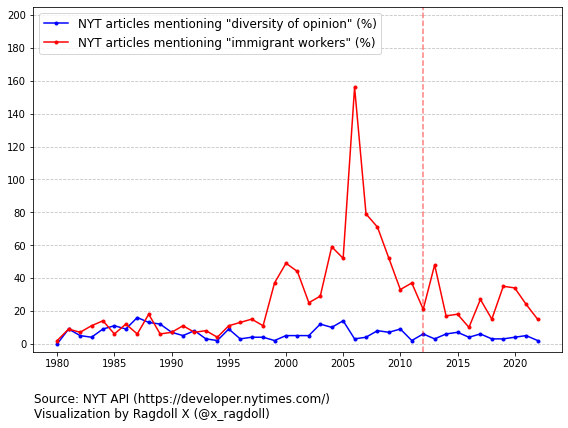

In [58]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

ax.plot(range(1980, 2023), results_opinion, marker='.', color='blue', label='NYT articles mentioning "diversity of opinion" (%)')
ax.plot(range(1980, 2023), results_immigrant_workers, marker='.', color='red', label='NYT articles mentioning "immigrant workers" (%)')
ax.set_xticks(range(1980, 2023, 5))
ax.set_xticklabels(range(1980, 2023, 5))
ax.set_ylim((-5, 205))
ax.set_yticks(range(0, 201, 20))
ax.grid(axis='y', linestyle='--', alpha=.75)
ax.legend(fontsize=12, loc='upper left')
ax.text(1978, -45, 'Source: NYT API (https://developer.nytimes.com/)\nVisualization by Ragdoll X (@x_ragdoll)', fontsize=12)

plt.tight_layout()
plt.show()
fig.savefig(
    expanduser('~')+'/Documents/Surveys/Does The Left Focus Too Much on Racism/fig3.png',
    facecolor='w', edgecolor='w', transparent=False, dpi=80
)

---

In [3]:
df = pd.read_csv(expanduser('~')+'/Documents/Surveys/Does The Left Focus Too Much on Racism/Pew new.csv', header=None, index_col=0).T
df.columns = ['year', 'pol'] + list(df.columns[2:])
df = df.iloc[::-1]
df.head()

,year,pol,economy,terrorism,healthcare costs,lobbying,securing medicare,securing social security,budget deficit,education,...,problems of the poor,environment,climate change/global warming,roads and transportation,military,global trade,tax reform,issues around race,race relations,dealing with moral breakdown
48,2000,dem,73,NaN,NaN,NaN,69,77,NaN,78,...,65,59,NaN,NaN,NaN,35,NaN,NaN,56,45
47,2000,rep,66,NaN,NaN,NaN,54,61,NaN,68,...,42,40,NaN,NaN,NaN,26,NaN,NaN,39,55
46,2001,dem,84,NaN,NaN,NaN,NaN,83,NaN,82,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45,2001,rep,78,NaN,NaN,NaN,NaN,68,NaN,69,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44,2002,dem,71,82,NaN,NaN,69,76,41,68,...,62,52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44


In [4]:
markers = ['.', 'v', '2', 's', 'p', 'X', 'd', '11']

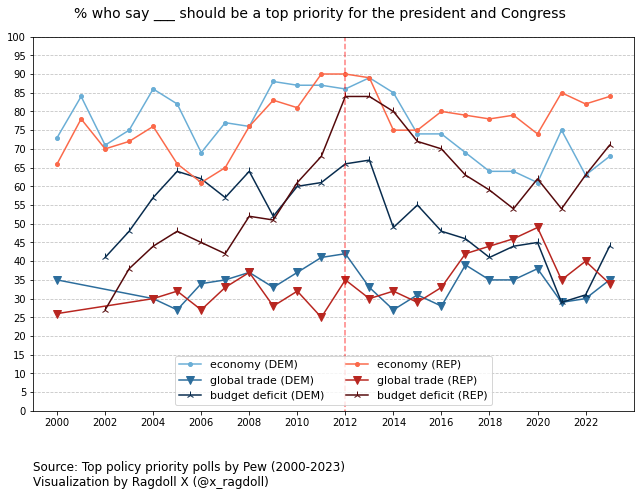

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(9, 7))
greys = plt.get_cmap('Greys')
colors_dem = plt.get_cmap('Blues')
colors_rep = plt.get_cmap('Reds')
columns = ['economy', 'global trade', 'budget deficit']

for i in range(len(columns)):
    data = df.iloc[np.where(df['pol'] == 'dem')][columns[i]].dropna()
    ax.plot(
        df.loc[data.index]['year'].astype('int32'),
        data.astype('int32'),
        marker = markers[i],
        markersize = 8,
        color = colors_dem(.5 + .5*i/len(columns)) * np.float32(greys(.9*i/len(columns))),
        label = '{} (DEM)'.format(columns[i])
    )
for i in range(len(columns)):
    data = df.iloc[np.where(df['pol'] == 'rep')][columns[i]].dropna()
    ax.plot(
        df.loc[data.index]['year'].astype('int32'),
        data.astype('int32'),
        marker = markers[i],
        markersize = 8,
        color = colors_rep(.5 + .5*i/len(columns)) * np.float32(greys(.9*i/len(columns))),
        label = '{} (REP)'.format(columns[i])
    )
ax.plot((2012, 2012), (-1, 101), 'r--', alpha=.5)
ax.set_xlim(1999, 2024)
ax.set_xticks(range(2000, 2024, 2))
ax.set_xticklabels(range(2000, 2024, 2))
ax.set_ylim((0, 100))
ax.set_yticks(range(0, 101, 5))
ax.set_yticklabels(range(0, 101, 5))
ax.grid(axis='y', linestyle='--', alpha=.75)
ax.legend(fontsize=11, loc='lower center', ncol=2)
ax.text(1999, -20, 'Source: Top policy priority polls by Pew (2000-2023)\nVisualization by Ragdoll X (@x_ragdoll)', fontsize=12)
fig.suptitle('% who say ___ should be a top priority for the president and Congress', fontsize=14)

plt.tight_layout()
plt.show()
fig.savefig(
    expanduser('~')+'/Documents/Surveys/Does The Left Focus Too Much on Racism/fig4.png',
    facecolor='w', edgecolor='w', transparent=False, dpi=80
)

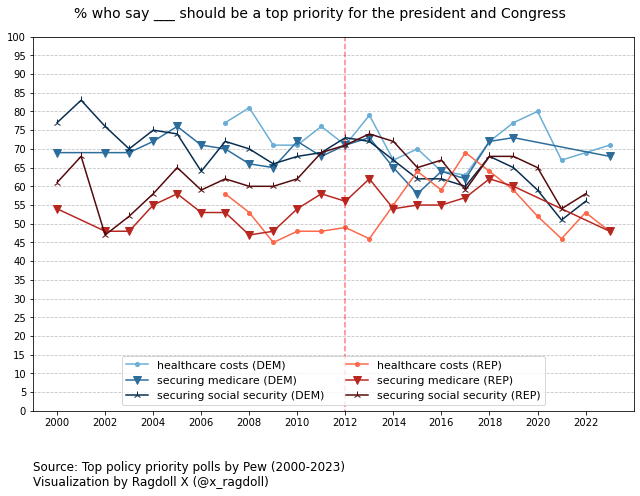

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(9, 7))
greys = plt.get_cmap('Greys')
colors_dem = plt.get_cmap('Blues')
colors_rep = plt.get_cmap('Reds')
columns = ['healthcare costs', 'securing medicare', 'securing social security']

for i in range(len(columns)):
    data = df.iloc[np.where(df['pol'] == 'dem')][columns[i]].dropna()
    ax.plot(
        df.loc[data.index]['year'].astype('int32'),
        data.astype('int32'),
        marker = markers[i],
        markersize = 8,
        color = colors_dem(.5 + .5*i/len(columns)) * np.float32(greys(.9*i/len(columns))),
        label = '{} (DEM)'.format(columns[i])
    )
for i in range(len(columns)):
    data = df.iloc[np.where(df['pol'] == 'rep')][columns[i]].dropna()
    ax.plot(
        df.loc[data.index]['year'].astype('int32'),
        data.astype('int32'),
        marker = markers[i],
        markersize = 8,
        color = colors_rep(.5 + .5*i/len(columns)) * np.float32(greys(.9*i/len(columns))),
        label = '{} (REP)'.format(columns[i])
    )
ax.plot((2012, 2012), (-1, 101), 'r--', alpha=.5)
ax.set_xlim(1999, 2024)
ax.set_xticks(range(2000, 2024, 2))
ax.set_xticklabels(range(2000, 2024, 2))
ax.set_ylim((0, 100))
ax.set_yticks(range(0, 101, 5))
ax.set_yticklabels(range(0, 101, 5))
ax.grid(axis='y', linestyle='--', alpha=.75)
ax.legend(fontsize=11, loc='lower center', ncol=2)
ax.text(1999, -20, 'Source: Top policy priority polls by Pew (2000-2023)\nVisualization by Ragdoll X (@x_ragdoll)', fontsize=12)
fig.suptitle('% who say ___ should be a top priority for the president and Congress', fontsize=14)

plt.tight_layout()
plt.show()
fig.savefig(
    expanduser('~')+'/Documents/Surveys/Does The Left Focus Too Much on Racism/fig5.png',
    facecolor='w', edgecolor='w', transparent=False, dpi=80
)

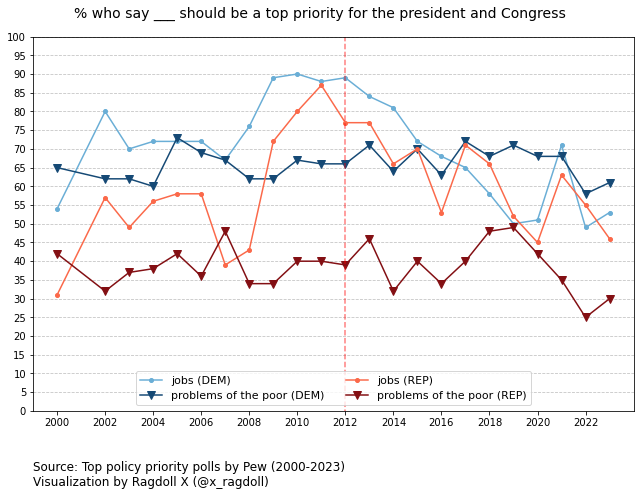

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(9, 7))
greys = plt.get_cmap('Greys')
colors_dem = plt.get_cmap('Blues')
colors_rep = plt.get_cmap('Reds')
columns = ['jobs', 'problems of the poor']

for i in range(len(columns)):
    data = df.iloc[np.where(df['pol'] == 'dem')][columns[i]].dropna()
    ax.plot(
        df.loc[data.index]['year'].astype('int32'),
        data.astype('int32'),
        marker = markers[i],
        markersize = 8,
        color = colors_dem(.5 + .5*i/len(columns)) * np.float32(greys(.9*i/len(columns))),
        label = '{} (DEM)'.format(columns[i])
    )
for i in range(len(columns)):
    data = df.iloc[np.where(df['pol'] == 'rep')][columns[i]].dropna()
    ax.plot(
        df.loc[data.index]['year'].astype('int32'),
        data.astype('int32'),
        marker = markers[i],
        markersize = 8,
        color = colors_rep(.5 + .5*i/len(columns)) * np.float32(greys(.9*i/len(columns))),
        label = '{} (REP)'.format(columns[i])
    )
ax.plot((2012, 2012), (-1, 101), 'r--', alpha=.5)
ax.set_xlim(1999, 2024)
ax.set_xticks(range(2000, 2024, 2))
ax.set_xticklabels(range(2000, 2024, 2))
ax.set_ylim((0, 100))
ax.set_yticks(range(0, 101, 5))
ax.set_yticklabels(range(0, 101, 5))
ax.grid(axis='y', linestyle='--', alpha=.75)
ax.legend(fontsize=11, loc='lower center', ncol=2)
ax.text(1999, -20, 'Source: Top policy priority polls by Pew (2000-2023)\nVisualization by Ragdoll X (@x_ragdoll)', fontsize=12)
fig.suptitle('% who say ___ should be a top priority for the president and Congress', fontsize=14)

plt.tight_layout()
plt.show()
fig.savefig(
    expanduser('~')+'/Documents/Surveys/Does The Left Focus Too Much on Racism/fig6.png',
    facecolor='w', edgecolor='w', transparent=False, dpi=80
)

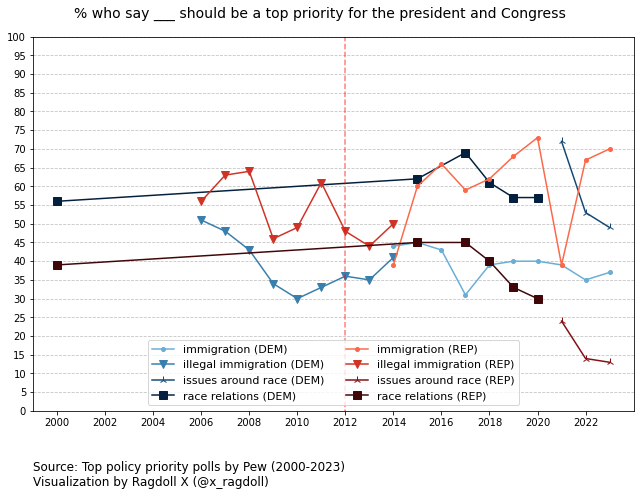

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(9, 7))
greys = plt.get_cmap('Greys')
colors_dem = plt.get_cmap('Blues')
colors_rep = plt.get_cmap('Reds')
columns = ['immigration', 'illegal immigration', 'issues around race', 'race relations']

for i in range(len(columns)):
    data = df.iloc[np.where(df['pol'] == 'dem')][columns[i]].dropna()
    ax.plot(
        df.loc[data.index]['year'].astype('int32'),
        data.astype('int32'),
        marker = markers[i],
        markersize = 8,
        color = colors_dem(.5 + .5*i/len(columns)) * np.float32(greys(.9*i/len(columns))),
        label = '{} (DEM)'.format(columns[i])
    )
for i in range(len(columns)):
    data = df.iloc[np.where(df['pol'] == 'rep')][columns[i]].dropna()
    ax.plot(
        df.loc[data.index]['year'].astype('int32'),
        data.astype('int32'),
        marker = markers[i],
        markersize = 8,
        color = colors_rep(.5 + .5*i/len(columns)) * np.float32(greys(.9*i/len(columns))),
        label = '{} (REP)'.format(columns[i])
    )
ax.plot((2012, 2012), (-1, 101), 'r--', alpha=.5)
ax.set_xlim(1999, 2024)
ax.set_xticks(range(2000, 2024, 2))
ax.set_xticklabels(range(2000, 2024, 2))
ax.set_ylim((0, 100))
ax.set_yticks(range(0, 101, 5))
ax.set_yticklabels(range(0, 101, 5))
ax.grid(axis='y', linestyle='--', alpha=.75)
ax.legend(fontsize=11, loc='lower center', ncol=2)
ax.text(1999, -20, 'Source: Top policy priority polls by Pew (2000-2023)\nVisualization by Ragdoll X (@x_ragdoll)', fontsize=12)
fig.suptitle('% who say ___ should be a top priority for the president and Congress', fontsize=14)

plt.tight_layout()
plt.show()
fig.savefig(
    expanduser('~')+'/Documents/Surveys/Does The Left Focus Too Much on Racism/fig7.png',
    facecolor='w', edgecolor='w', transparent=False, dpi=80
)

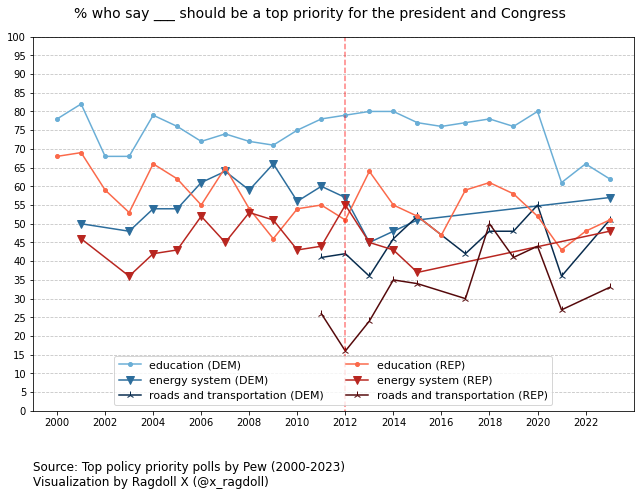

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(9, 7))
greys = plt.get_cmap('Greys')
colors_dem = plt.get_cmap('Blues')
colors_rep = plt.get_cmap('Reds')
columns = ['education', 'energy system', 'roads and transportation']

for i in range(len(columns)):
    data = df.iloc[np.where(df['pol'] == 'dem')][columns[i]].dropna()
    ax.plot(
        df.loc[data.index]['year'].astype('int32'),
        data.astype('int32'),
        marker = markers[i],
        markersize = 8,
        color = colors_dem(.5 + .5*i/len(columns)) * np.float32(greys(.9*i/len(columns))),
        label = '{} (DEM)'.format(columns[i])
    )
for i in range(len(columns)):
    data = df.iloc[np.where(df['pol'] == 'rep')][columns[i]].dropna()
    ax.plot(
        df.loc[data.index]['year'].astype('int32'),
        data.astype('int32'),
        marker = markers[i],
        markersize = 8,
        color = colors_rep(.5 + .5*i/len(columns)) * np.float32(greys(.9*i/len(columns))),
        label = '{} (REP)'.format(columns[i])
    )
ax.plot((2012, 2012), (-1, 101), 'r--', alpha=.5)
ax.set_xlim(1999, 2024)
ax.set_xticks(range(2000, 2024, 2))
ax.set_xticklabels(range(2000, 2024, 2))
ax.set_ylim((0, 100))
ax.set_yticks(range(0, 101, 5))
ax.set_yticklabels(range(0, 101, 5))
ax.grid(axis='y', linestyle='--', alpha=.75)
ax.legend(fontsize=11, loc='lower center', ncol=2)
ax.text(1999, -20, 'Source: Top policy priority polls by Pew (2000-2023)\nVisualization by Ragdoll X (@x_ragdoll)', fontsize=12)
fig.suptitle('% who say ___ should be a top priority for the president and Congress', fontsize=14)

plt.tight_layout()
plt.show()
fig.savefig(
    expanduser('~')+'/Documents/Surveys/Does The Left Focus Too Much on Racism/fig8.png',
    facecolor='w', edgecolor='w', transparent=False, dpi=80
)

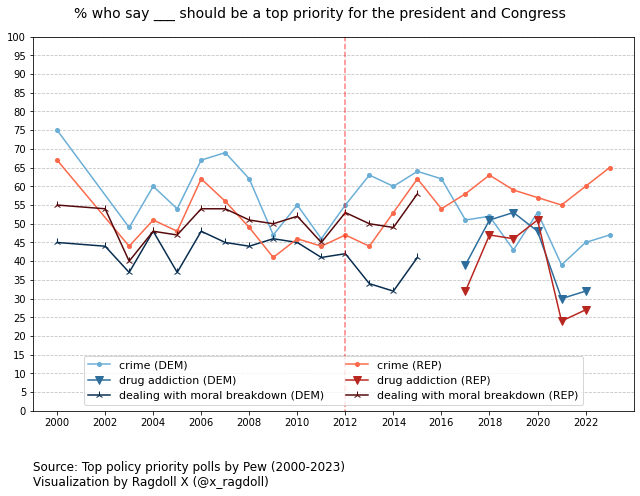

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(9, 7))
greys = plt.get_cmap('Greys')
colors_dem = plt.get_cmap('Blues')
colors_rep = plt.get_cmap('Reds')
columns = ['crime', 'drug addiction', 'dealing with moral breakdown']

for i in range(len(columns)):
    data = df.iloc[np.where(df['pol'] == 'dem')][columns[i]].dropna()
    ax.plot(
        df.loc[data.index]['year'].astype('int32'),
        data.astype('int32'),
        marker = markers[i],
        markersize = 8,
        color = colors_dem(.5 + .5*i/len(columns)) * np.float32(greys(.9*i/len(columns))),
        label = '{} (DEM)'.format(columns[i])
    )
for i in range(len(columns)):
    data = df.iloc[np.where(df['pol'] == 'rep')][columns[i]].dropna()
    ax.plot(
        df.loc[data.index]['year'].astype('int32'),
        data.astype('int32'),
        marker = markers[i],
        markersize = 8,
        color = colors_rep(.5 + .5*i/len(columns)) * np.float32(greys(.9*i/len(columns))),
        label = '{} (REP)'.format(columns[i])
    )
ax.plot((2012, 2012), (-1, 101), 'r--', alpha=.5)
ax.set_xlim(1999, 2024)
ax.set_xticks(range(2000, 2024, 2))
ax.set_xticklabels(range(2000, 2024, 2))
ax.set_ylim((0, 100))
ax.set_yticks(range(0, 101, 5))
ax.set_yticklabels(range(0, 101, 5))
ax.grid(axis='y', linestyle='--', alpha=.75)
ax.legend(fontsize=11, loc='lower center', ncol=2)
ax.text(1999, -20, 'Source: Top policy priority polls by Pew (2000-2023)\nVisualization by Ragdoll X (@x_ragdoll)', fontsize=12)
fig.suptitle('% who say ___ should be a top priority for the president and Congress', fontsize=14)

plt.tight_layout()
plt.show()
fig.savefig(
    expanduser('~')+'/Documents/Surveys/Does The Left Focus Too Much on Racism/fig9.png',
    facecolor='w', edgecolor='w', transparent=False, dpi=80
)

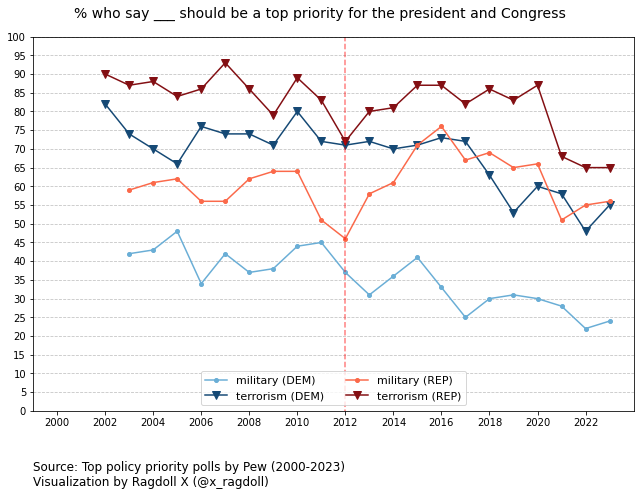

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(9, 7))
greys = plt.get_cmap('Greys')
colors_dem = plt.get_cmap('Blues')
colors_rep = plt.get_cmap('Reds')
columns = ['military', 'terrorism']

for i in range(len(columns)):
    data = df.iloc[np.where(df['pol'] == 'dem')][columns[i]].dropna()
    ax.plot(
        df.loc[data.index]['year'].astype('int32'),
        data.astype('int32'),
        marker = markers[i],
        markersize = 8,
        color = colors_dem(.5 + .5*i/len(columns)) * np.float32(greys(.9*i/len(columns))),
        label = '{} (DEM)'.format(columns[i])
    )
for i in range(len(columns)):
    data = df.iloc[np.where(df['pol'] == 'rep')][columns[i]].dropna()
    ax.plot(
        df.loc[data.index]['year'].astype('int32'),
        data.astype('int32'),
        marker = markers[i],
        markersize = 8,
        color = colors_rep(.5 + .5*i/len(columns)) * np.float32(greys(.9*i/len(columns))),
        label = '{} (REP)'.format(columns[i])
    )
ax.plot((2012, 2012), (-1, 101), 'r--', alpha=.5)
ax.set_xlim(1999, 2024)
ax.set_xticks(range(2000, 2024, 2))
ax.set_xticklabels(range(2000, 2024, 2))
ax.set_ylim((0, 100))
ax.set_yticks(range(0, 101, 5))
ax.set_yticklabels(range(0, 101, 5))
ax.grid(axis='y', linestyle='--', alpha=.75)
ax.legend(fontsize=11, loc='lower center', ncol=2)
ax.text(1999, -20, 'Source: Top policy priority polls by Pew (2000-2023)\nVisualization by Ragdoll X (@x_ragdoll)', fontsize=12)
fig.suptitle('% who say ___ should be a top priority for the president and Congress', fontsize=14)

plt.tight_layout()
plt.show()
fig.savefig(
    expanduser('~')+'/Documents/Surveys/Does The Left Focus Too Much on Racism/fig10.png',
    facecolor='w', edgecolor='w', transparent=False, dpi=80
)

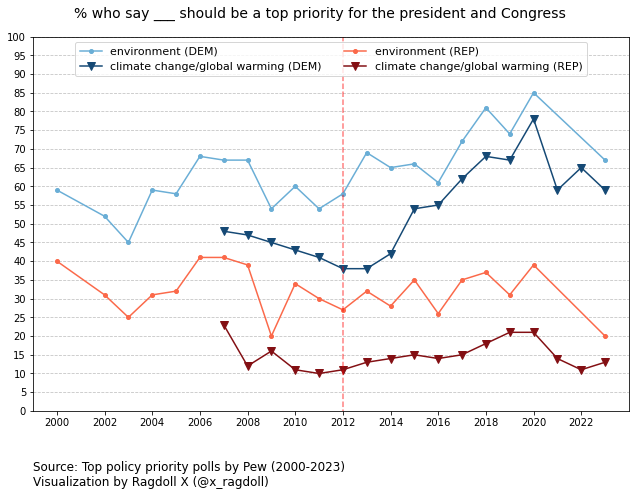

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(9, 7))
greys = plt.get_cmap('Greys')
colors_dem = plt.get_cmap('Blues')
colors_rep = plt.get_cmap('Reds')
columns = ['environment', 'climate change/global warming']

for i in range(len(columns)):
    data = df.iloc[np.where(df['pol'] == 'dem')][columns[i]].dropna()
    ax.plot(
        df.loc[data.index]['year'].astype('int32'),
        data.astype('int32'),
        marker = markers[i],
        markersize = 8,
        color = colors_dem(.5 + .5*i/len(columns)) * np.float32(greys(.9*i/len(columns))),
        label = '{} (DEM)'.format(columns[i])
    )
for i in range(len(columns)):
    data = df.iloc[np.where(df['pol'] == 'rep')][columns[i]].dropna()
    ax.plot(
        df.loc[data.index]['year'].astype('int32'),
        data.astype('int32'),
        marker = markers[i],
        markersize = 8,
        color = colors_rep(.5 + .5*i/len(columns)) * np.float32(greys(.9*i/len(columns))),
        label = '{} (REP)'.format(columns[i])
    )
ax.plot((2012, 2012), (-1, 101), 'r--', alpha=.5)
ax.set_xlim(1999, 2024)
ax.set_xticks(range(2000, 2024, 2))
ax.set_xticklabels(range(2000, 2024, 2))
ax.set_ylim((0, 100))
ax.set_yticks(range(0, 101, 5))
ax.set_yticklabels(range(0, 101, 5))
ax.grid(axis='y', linestyle='--', alpha=.75)
ax.legend(fontsize=11, loc='upper center', ncol=2)
ax.text(1999, -20, 'Source: Top policy priority polls by Pew (2000-2023)\nVisualization by Ragdoll X (@x_ragdoll)', fontsize=12)
fig.suptitle('% who say ___ should be a top priority for the president and Congress', fontsize=14)

plt.tight_layout()
plt.show()
fig.savefig(
    expanduser('~')+'/Documents/Surveys/Does The Left Focus Too Much on Racism/fig11.png',
    facecolor='w', edgecolor='w', transparent=False, dpi=80
)